In [2]:
!pip install pandas tensorflow scikit-learn


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import warnings
warnings.filterwarnings('ignore')
# Đọc dữ liệu
df = pd.read_csv('clean_employee_data.csv')

# Tiền xử lý
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: LabelEncoder().fit_transform(x))

# Chọn các cột đầu vào
X = df.drop(['EmpID', 'EmployeeStatus'], axis=1)
y = df['EmployeeStatus']

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình
model_classification = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Nếu chỉ có 2 lớp
])

model_classification.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
model_classification.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Lưu mô hình
model_classification.save('employee_classification_model.keras')


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.4387 - loss: 249.5152 - val_accuracy: 0.1646 - val_loss: 54.1989
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3999 - loss: 67.1995 - val_accuracy: 0.7250 - val_loss: 60.3965
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4350 - loss: 46.3244 - val_accuracy: 0.7563 - val_loss: 62.8266
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4453 - loss: 41.9665 - val_accuracy: 0.4458 - val_loss: 6.6790
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4330 - loss: 36.3759 - val_accuracy: 0.2792 - val_loss: 4.3949
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4382 - loss: 62.8493 - val_accuracy: 0.7000 - val_loss: 50.9212
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4940 - loss: 32.1270 - val_accuracy: 0.6979 - val_loss: 43.5472
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4655 - loss: 17.7735 - val_accuracy: 0.4

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4223 - loss: 51.0010 - val_accuracy: 0.7563 - val_loss: 160.3026
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4681 - loss: 52.0528 - val_accuracy: 0.6062 - val_loss: 6.5732
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4739 - loss: 5.9420 - val_accuracy: 0.3500 - val_loss: -3.8475
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4656 - loss: 23.2143 - val_accuracy: 0.3688 - val_loss: -10.0100
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4221 - loss: 10.6617 - val_accuracy: 0.3562 - val_loss: -2.7684
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4918 - loss: 61.5355 - val_accuracy: 0.7500 - val_loss: 288.7394
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4578 - loss: 87.3506 - val_accuracy: 0.4062 - val_loss: -7.3457
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4787 - loss: 28.3069 - val_accuracy: 0.

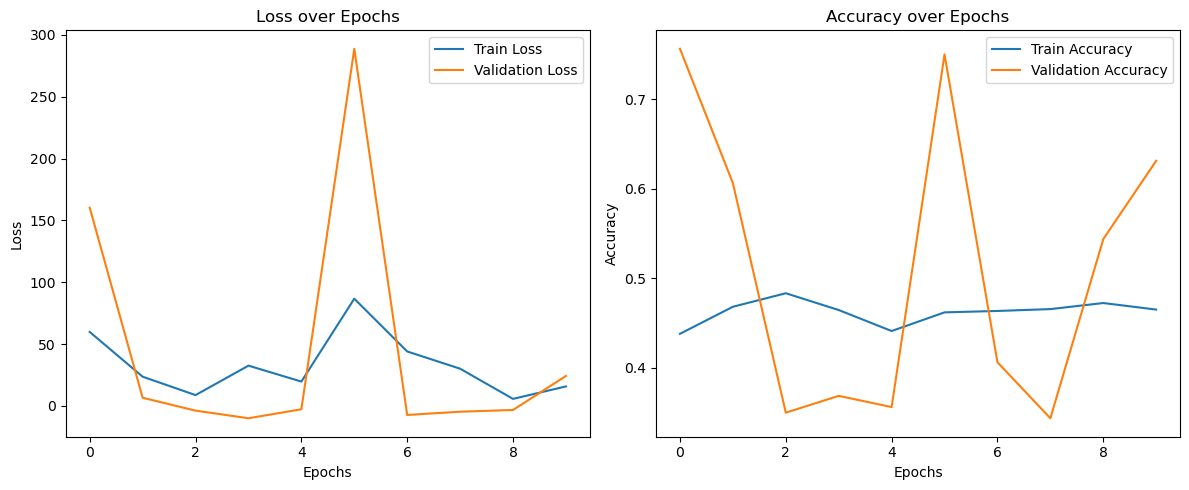

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Huấn luyện mô hình và lưu lịch sử
history = model_classification.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Vẽ biểu đồ loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Vẽ biểu đồ accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


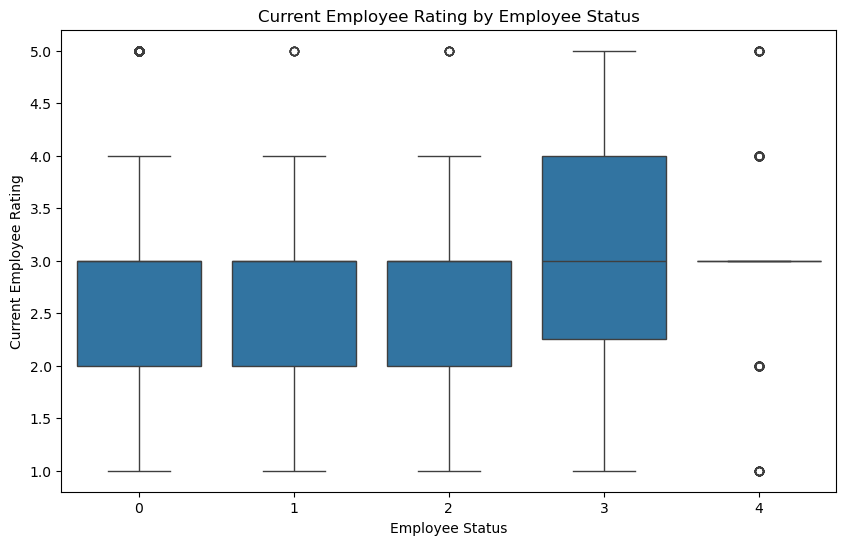

In [17]:
# Trực quan hóa Current Employee Rating theo EmployeeStatus
plt.figure(figsize=(10, 6))
sns.boxplot(x='EmployeeStatus', y='Current Employee Rating', data=df)
plt.title('Current Employee Rating by Employee Status')
plt.xlabel('Employee Status')
plt.ylabel('Current Employee Rating')
plt.show()


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9967 - loss: 0.1389 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.

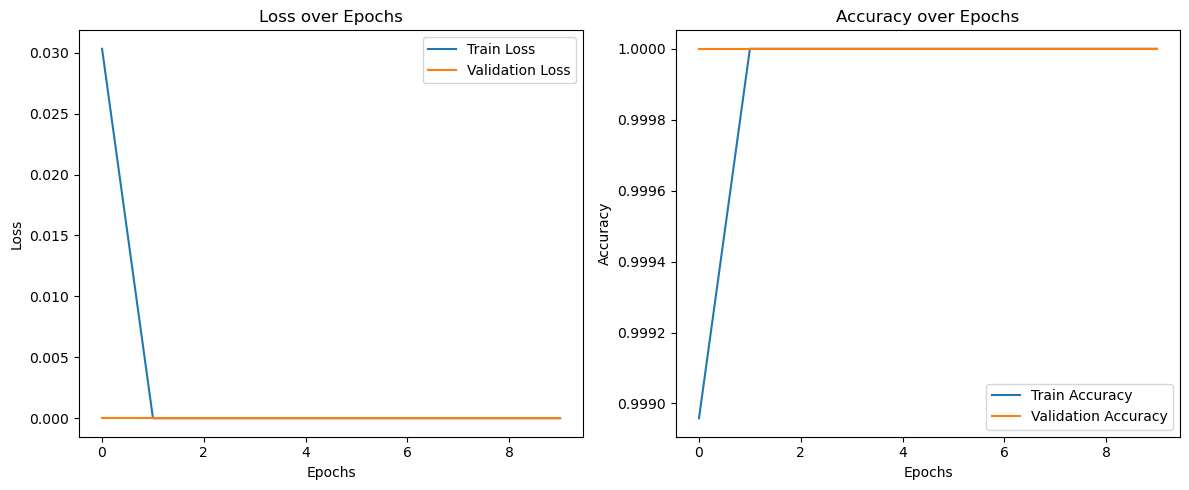

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

# Giả sử df đã được chuẩn bị từ trước
df['Exit'] = df['ExitDate'].notna().astype(int)

X = df.drop(['EmpID', 'ExitDate', 'Exit'], axis=1)
y = df['Exit']
X = pd.get_dummies(X)  # Chuyển đổi biến phân loại

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình
model_turnover = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_turnover.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình và lưu lịch sử
history = model_turnover.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Lưu mô hình
model_turnover.save('employee_turnover_model.keras')

# Trực quan hóa lịch sử huấn luyện
plt.figure(figsize=(12, 5))

# Biểu đồ Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Biểu đồ Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


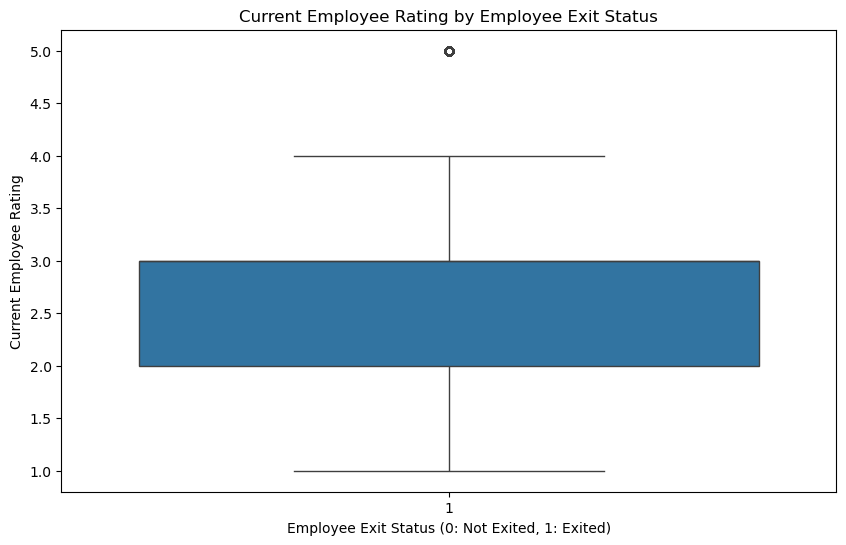

In [20]:
# Trực quan hóa Current Employee Rating theo sự ra đi của nhân viên
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exit', y='Current Employee Rating', data=df)
plt.title('Current Employee Rating by Employee Exit Status')
plt.xlabel('Employee Exit Status (0: Not Exited, 1: Exited)')
plt.ylabel('Current Employee Rating')
plt.show()


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.1210 - loss: 0.0765 - val_accuracy: 0.1542 - val_loss: -5.6475
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1178 - loss: -8.8710 - val_accuracy: 0.1542 - val_loss: -13.5009
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1375 - loss: -15.7022 - val_accuracy: 0.1542 - val_loss: -17.6685
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1697 - loss: -20.9862 - val_accuracy: 0.1542 - val_loss: -21.5204
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2401 - loss: -26.6862 - val_accuracy: 0.1542 - val_loss: -25.3457
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2512 - loss: -32.8088 - val_accuracy: 0.1542 - val_loss: -29.2353
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2443 - loss: -40.5363 - val_accuracy: 0.1542 - val_loss: -33.1596
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2543 - loss: -46.1442 - val_

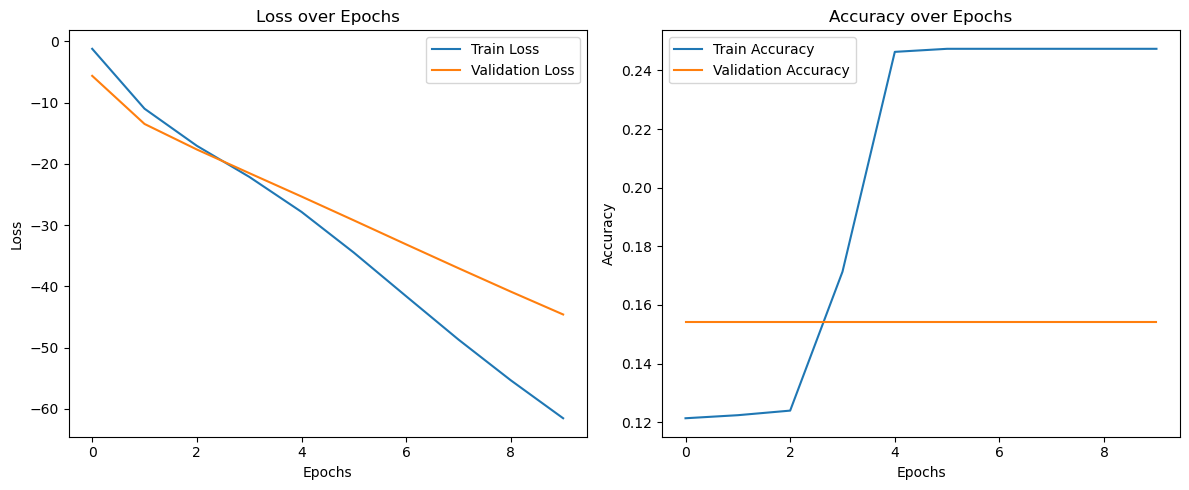

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Giả sử df đã được chuẩn bị từ trước
# Đảm bảo rằng cột 'TerminationDescription' và 'TerminationType' có dữ liệu hợp lệ
df['TerminationDescription'] = df['TerminationDescription'].astype(str)

# Chọn X và y
X = df['TerminationDescription']
y = df['TerminationType']  # Hoặc bất kỳ nhãn nào bạn muốn

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenization
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences
X_train_pad = pad_sequences(X_train_seq, padding='post')
X_test_pad = pad_sequences(X_test_seq, padding='post')

# Xây dựng mô hình
model_sentiment = keras.Sequential([
    layers.Embedding(input_dim=1000, output_dim=64, input_length=X_train_pad.shape[1]),
    layers.LSTM(64),
    layers.Dense(1, activation='sigmoid')
])

model_sentiment.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình và lưu lịch sử
history = model_sentiment.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Lưu mô hình
model_sentiment.save('sentiment_analysis_model.keras')

# Trực quan hóa lịch sử huấn luyện
plt.figure(figsize=(12, 5))

# Biểu đồ Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Biểu đồ Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


TerminationType
Layoff         1467
Voluntary       388
Other           388
Involuntary     380
Retirement      377
Name: count, dtype: int64


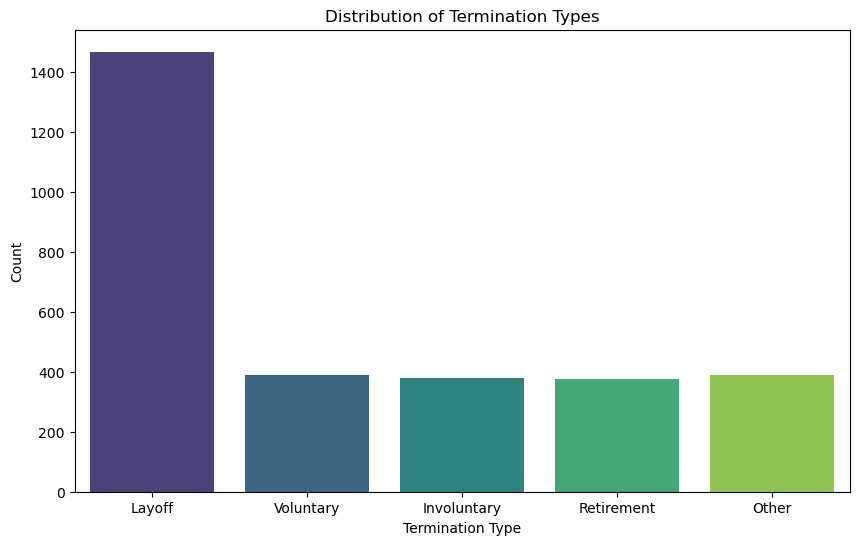

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả định rằng df là DataFrame của bạn và 'TerminationType' chứa các giá trị 0, 1, 2, 3, 4
# Đặt mapping cho các giá trị
termination_mapping = {
    0: 'Voluntary',
    1: 'Involuntary',
    2: 'Retirement',
    3: 'Layoff',
    4: 'Other'
}

# Đưa cột 'TerminationType' về dạng ban đầu
df['TerminationType'] = df['TerminationType'].map(termination_mapping)

# Kiểm tra các giá trị độc nhất của cột 'TerminationType'
print(df['TerminationType'].value_counts())

# Vẽ biểu đồ phân bố của các loại kết thúc
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TerminationType', palette='viridis')
plt.title('Distribution of Termination Types')
plt.xlabel('Termination Type')
plt.ylabel('Count')
plt.show()


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 580698.6875 - val_loss: 2062.9763
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 992.1797 - val_loss: 293.9943
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 247.3193 - val_loss: 75.9720
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 34.6912 - val_loss: 10.6517
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.7390 - val_loss: 7.4516
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.9682 - val_loss: 7.0993
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.1584 - val_loss: 5.7106
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.5750 - val_loss: 5.1217
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.6251 - val_loss: 5.1162
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.9800 - val_loss: 4.8557
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


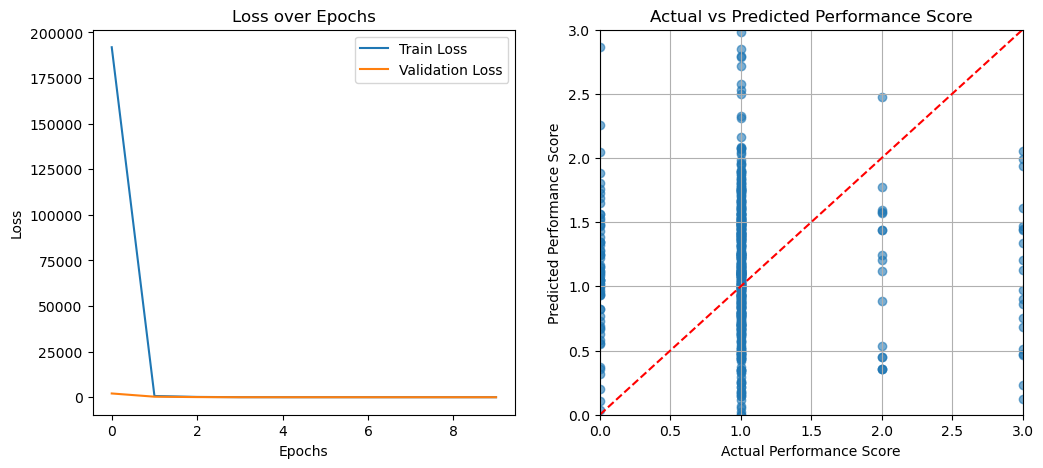

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

# Giả sử df đã được chuẩn bị từ trước
# Dự đoán điểm hiệu suất
X = df.drop(['EmpID', 'Performance Score'], axis=1)
y = df['Performance Score'].astype(int)  # Chuyển đổi thành kiểu int nếu cần
X = pd.get_dummies(X)  # Chuyển đổi biến phân loại
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuyển đổi X_train và y_train thành mảng NumPy
X_train = X_train.to_numpy().astype(np.float32)  # Chuyển đổi sang kiểu float32
y_train = y_train.to_numpy().astype(np.float32)  # Chuyển đổi sang kiểu float32

# Chuyển đổi X_test thành mảng NumPy và kiểm tra
X_test = X_test.to_numpy().astype(np.float32)  # Chuyển đổi sang kiểu float32
y_test = y_test.to_numpy().astype(np.float32)  # Chuyển đổi sang kiểu float32

# Xây dựng mô hình
model_performance = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Đầu ra là số thực
])

model_performance.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình và lưu lịch sử
history = model_performance.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Lưu mô hình
model_performance.save('performance_score_model.keras')

# Trực quan hóa lịch sử huấn luyện
plt.figure(figsize=(12, 5))

# Biểu đồ Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Dự đoán trên tập kiểm tra
y_pred = model_performance.predict(X_test)

# Biểu đồ giá trị dự đoán so với giá trị thực tế
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Đường chuẩn
plt.title('Actual vs Predicted Performance Score')
plt.xlabel('Actual Performance Score')
plt.ylabel('Predicted Performance Score')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()


Các cột trong DataFrame: Index(['EmpID', 'FirstName', 'LastName', 'StartDate', 'ExitDate', 'Title',
       'Supervisor', 'ADEmail', 'BusinessUnit', 'EmployeeStatus',
       'EmployeeType', 'PayZone', 'EmployeeClassificationType',
       'TerminationType', 'TerminationDescription', 'DepartmentType',
       'Division', 'DOB', 'State', 'JobFunctionDescription', 'GenderCode',
       'LocationCode', 'RaceDesc', 'MaritalDesc', 'Performance Score',
       'Current Employee Rating', 'Exit'],
      dtype='object')
Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 81936.3047 - val_loss: 1994.1086
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 859.3945 - val_loss: 274.6959
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 187.2343 - val_loss: 79.1770
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 57.4716 - val_loss: 31.2393
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.1719 - val_loss: 16.4100
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step 

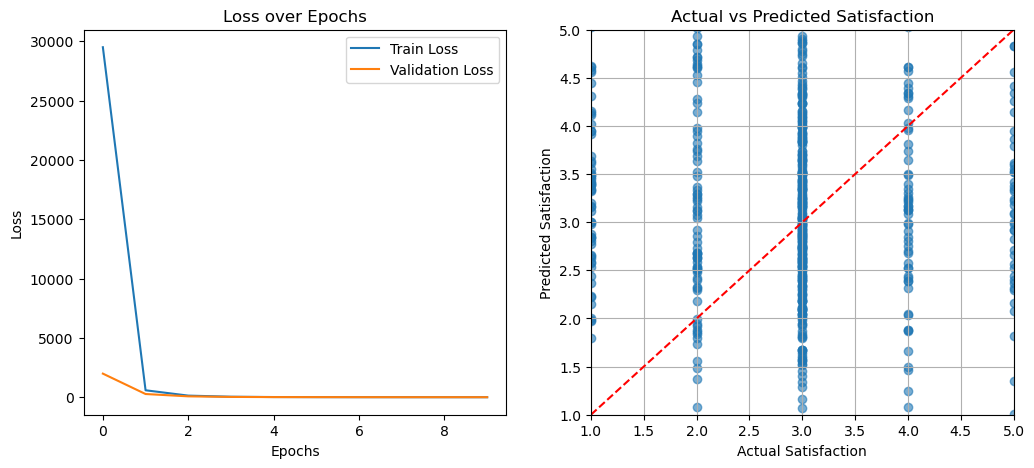

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

# Giả sử df đã được chuẩn bị từ trước
# Kiểm tra tên cột trong DataFrame
print("Các cột trong DataFrame:", df.columns)

# Tìm kiếm yếu tố ảnh hưởng
try:
    # Thay thế cột 'Satisfaction' bằng 'Current Employee Rating'
    X = df.drop(['EmpID', 'Current Employee Rating'], axis=1)
    y = df['Current Employee Rating']  # Cột đánh giá mới
except KeyError as e:
    print(f"Lỗi: {e}. Vui lòng kiểm tra lại tên cột trong DataFrame.")

# Chuyển đổi biến phân loại
X = pd.get_dummies(X)  # Chuyển đổi biến phân loại
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuyển đổi X_train và y_train thành mảng NumPy
X_train = X_train.to_numpy().astype(np.float32)  # Chuyển đổi sang kiểu float32
y_train = y_train.to_numpy().astype(np.float32)  # Chuyển đổi sang kiểu float32

# Chuyển đổi X_test thành mảng NumPy và kiểm tra
X_test = X_test.to_numpy().astype(np.float32)  # Chuyển đổi sang kiểu float32
y_test = y_test.to_numpy().astype(np.float32)  # Chuyển đổi sang kiểu float32

# Xây dựng mô hình
model_satisfaction = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Đầu ra là số thực
])

model_satisfaction.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình và lưu lịch sử
history = model_satisfaction.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Lưu mô hình
model_satisfaction.save('satisfaction_model.keras')

# Trực quan hóa lịch sử huấn luyện
plt.figure(figsize=(12, 5))

# Biểu đồ Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Dự đoán trên tập kiểm tra
y_pred = model_satisfaction.predict(X_test)

# Biểu đồ giá trị dự đoán so với giá trị thực tế
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Đường chuẩn
plt.title('Actual vs Predicted Satisfaction')
plt.xlabel('Actual Satisfaction')
plt.ylabel('Predicted Satisfaction')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 234372.8125 - val_loss: 237653.5000
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 252424.3750 - val_loss: 237653.5000
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 250336.3438 - val_loss: 237653.5000
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 244068.3125 - val_loss: 237653.5000
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 248962.2344 - val_loss: 237653.5000
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 243652.3906 - val_loss: 237653.5000
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 243261.1719 - val_loss: 237653.5000
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 241698.0156 - val_loss: 237653.5000
Epoch 9/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 247812.5312 - val_loss: 237653.5000
Epoch 10/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 242264.7812 - val_loss: 237653.5000
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


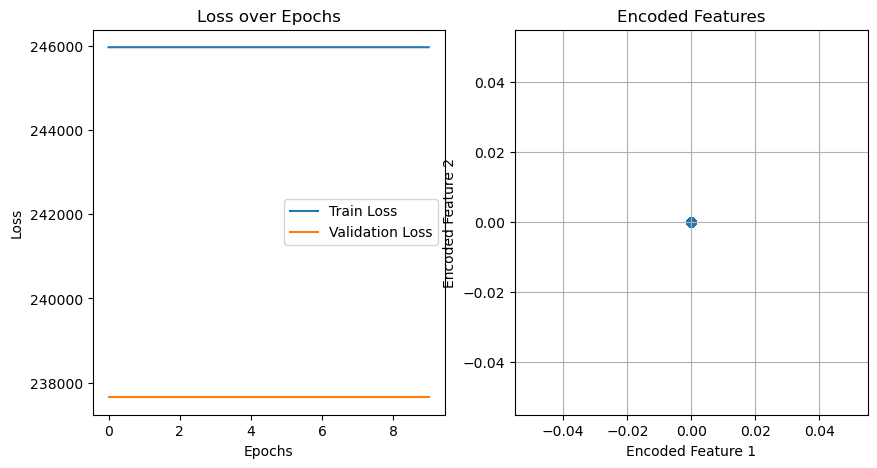

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Xóa các cột không cần thiết và chuyển đổi biến phân loại
X = df.drop(['EmpID', 'FirstName', 'LastName', 'ExitDate'], axis=1)

# Kiểm tra và loại bỏ các giá trị NaN
X = X.dropna()  # Xóa các hàng có giá trị NaN
X = pd.get_dummies(X)  # Chuyển đổi biến phân loại

# Chuyển đổi tất cả các cột về kiểu dữ liệu số (nếu cần)
X = X.astype(np.float32)

# Xây dựng mô hình autoencoder cho clustering
input_layer = Input(shape=(X.shape[1],))
encoded = Dense(32, activation='relu')(input_layer)
decoded = Dense(X.shape[1], activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình và lưu lịch sử
history = autoencoder.fit(X, X, epochs=10, batch_size=32, validation_split=0.2)

# Lưu mô hình
autoencoder.save('employee_clustering_model.keras')

# Trực quan hóa lịch sử huấn luyện
plt.figure(figsize=(10, 5))

# Biểu đồ Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Lấy các giá trị đã được mã hóa từ model
encoder = Model(input_layer, encoded)
encoded_data = encoder.predict(X)

# Biểu đồ phân tán của các đặc trưng đã được mã hóa
plt.subplot(1, 2, 2)
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], alpha=0.6)
plt.title('Encoded Features')
plt.xlabel('Encoded Feature 1')
plt.ylabel('Encoded Feature 2')
plt.grid()
plt.show()


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.4858 - val_loss: 0.7102
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.4251 - val_loss: 0.6566
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.3702 - val_loss: 0.6090
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.3203 - val_loss: 0.5632
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 0.2744 - val_loss: 0.5191
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.2330 - val_loss: 0.4768
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.1956 - val_loss: 0.4361
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.1629 - val_loss: 0.3963
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.1341 - val_loss: 0.3584
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.1097 - val_loss: 0.3227
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.0899 - val_loss: 0.2901
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.0743

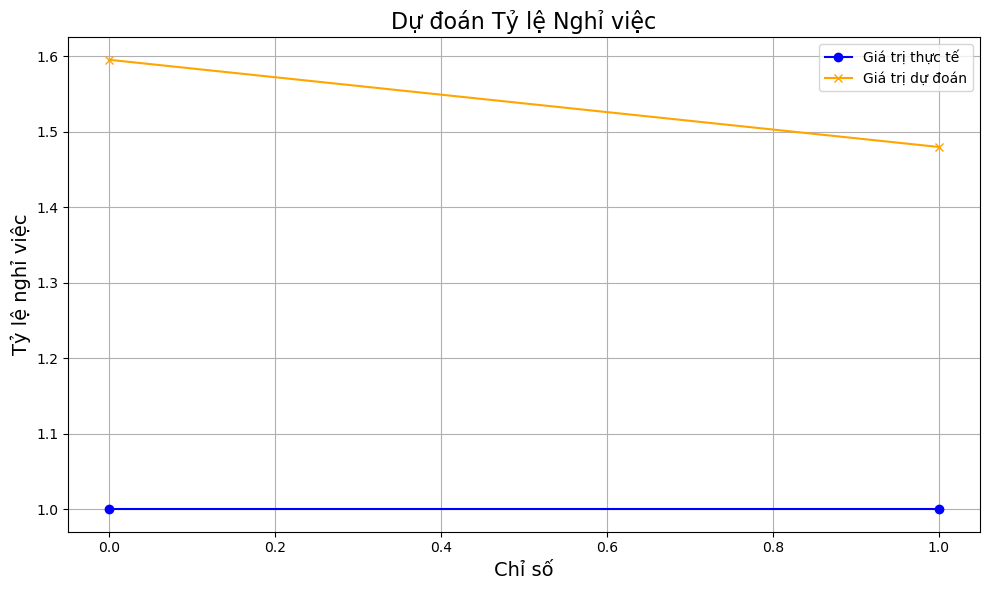

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Giả sử df đã được chuẩn bị từ trước
# Chuyển đổi cột StartDate thành kiểu datetime nếu chưa
df['StartDate'] = pd.to_datetime(df['StartDate'])

# Tạo cột năm từ cột StartDate
df['Year'] = df['StartDate'].dt.year

# Tính tỷ lệ nghỉ việc theo năm
turnover_data = df.groupby('Year').agg(
    total_employees=('EmpID', 'count'),
    total_exit=('ExitDate', lambda x: x.notnull().sum())
).reset_index()

turnover_data['turnover_rate'] = turnover_data['total_exit'] / turnover_data['total_employees']

# Xác định các đặc trưng (features) cho mô hình
X = turnover_data[['Year', 'total_employees']]  # Các đặc trưng
y = turnover_data['turnover_rate']  # Biến mục tiêu

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Xây dựng mô hình hồi quy
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Đầu ra là số thực

# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Dự đoán tỷ lệ nghỉ việc
y_pred = model.predict(X_test)

# Trực quan hóa kết quả
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Giá trị thực tế', color='blue', marker='o')
plt.plot(y_test.index, y_pred, label='Giá trị dự đoán', color='orange', marker='x')
plt.title('Dự đoán Tỷ lệ Nghỉ việc', fontsize=16)
plt.xlabel('Chỉ số', fontsize=14)
plt.ylabel('Tỷ lệ nghỉ việc', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('turnover_rate_prediction.png')  # Lưu hình ảnh
plt.show()  # Hiển thị biểu đồ

# Lưu mô hình
model.save('employee_turnover_model.keras')
